In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Simulate probability

In [5]:
llama = np.exp(np.load("../data/gen_probs_Llama-2-7b-hf.npy"))
gemma = np.exp(np.load("../data/gen_probs_gemma-7b.npy"))

In [6]:
prompts = []
for i in range(1024):
    s = format(i, '010b')
    prompts.append(s)

In [7]:
tab = []
for i in range(len(llama)):
    for j in range(10):
        val = prompts[i][j]
        tab.append((('Llama', llama[i][j], val)))
        tab.append((('Gemma', gemma[i][j], val)))
        
tab = pd.DataFrame(tab)
tab.columns = ["Model", "Probability", "Token"]

In [8]:
tab

,Model,Probability,Token
0,Llama,0.100879,0
1,Gemma,0.148047,0
2,Llama,0.515620,0
3,Gemma,0.731059,0
4,Llama,0.670608,0
...,...,...,...
20475,Gemma,0.777300,1
20476,Llama,0.991812,1
20477,Gemma,0.742982,1
20478,Llama,0.991938,1


In [9]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set(context='poster',
        style='ticks',
        font_scale=0.85,
        rc={'axes.grid':True,
            'grid.color':'.9',
            'grid.linewidth':0.75})

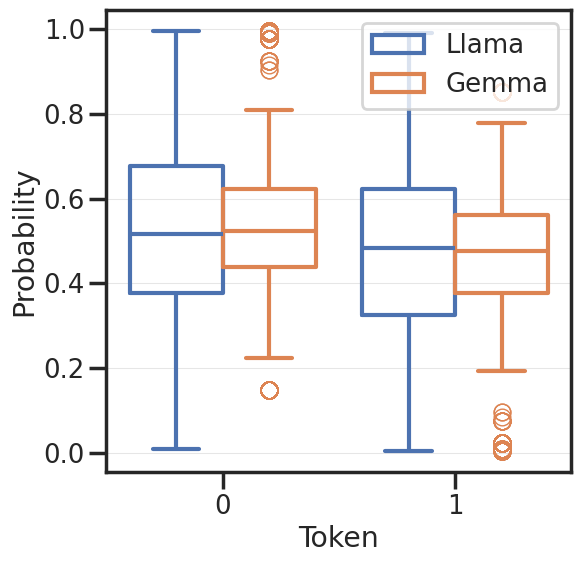

In [262]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=tab, y='Probability', x="Token", hue='Model', fill=False)
plt.legend(loc='upper right', frameon=True)

plt.savefig("../figures/jun9/llm_bernoulli75_box.svg", bbox_inches="tight")
plt.savefig("../figures/jun9/llm_bernoulli75_box.pdf", bbox_inches="tight")


plt.show()

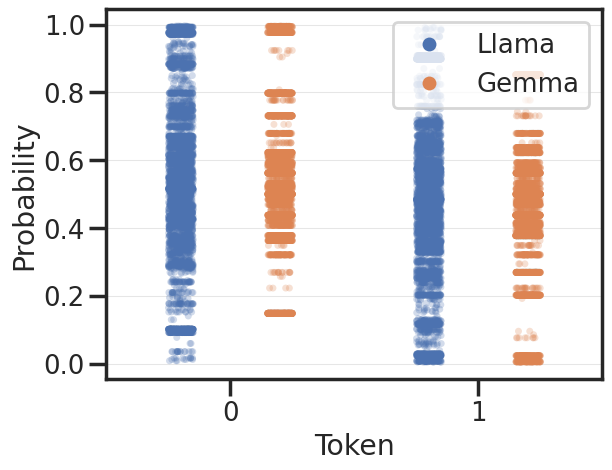

In [263]:
#sns.swarmplot(data=tab, x="Token", y="Probability", hue="Model")
sns.stripplot(data=tab, x="Token", y="Probability", hue="Model", dodge=True, alpha=0.25)

leg = plt.legend(frameon=True, markerscale=2)
for lh in leg.legend_handles: 
    lh.set_alpha(1)

plt.savefig("../figures/jun9/llm_bernoull75_strip.svg", bbox_inches="tight")
plt.savefig("../figures/jun9/llm_bernoull75_strip.pdf", bbox_inches="tight")


plt.show()

# Scenario 1

In [347]:
gemma_s1 = np.load("../data/scenario1_gemma-7b_90.npy")
llama_s1 = np.load("../data/scenario1_Llama-2-7b-hf_90.npy")

In [348]:
s1_info = np.load("../../synthetic/scenario1.npy", allow_pickle=True)


In [349]:
mean_mle = s1_info.item()['avg_errs']
std_mle = s1_info.item()['std_errs']
mle_x = np.arange(1, 20, 1)

In [350]:
perf = gemma_s1.mean(1)
mean = perf[:, 1]
std = gemma_s1.std(1)[:, 1] / np.sqrt(100.0)

In [351]:
mean_l = llama_s1.mean(1)[:, 1]
std_l = llama_s1.std(1)[:, 1] / np.sqrt(100.0)

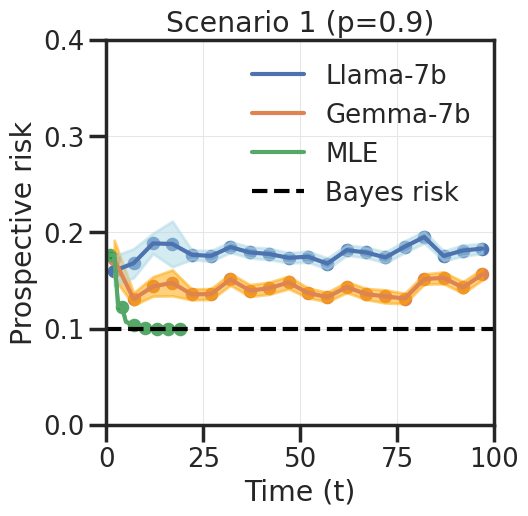

In [353]:
plt.figure(figsize=(5, 5))
plt.plot(perf[:, 0], llama_s1.mean(1)[:, 1])
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(mle_x, mean_mle)
plt.axhline(y=0.1, color='black', linestyle='--')

plt.scatter(perf[:, 0], llama_s1.mean(1)[:, 1], s=60)
plt.scatter(perf[:, 0], perf[:, 1], s=60)
plt.scatter(mle_x[::3], mean_mle[::3], s=60)


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='orange')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='lightblue')
plt.fill_between(mle_x, mean_mle - std_mle, mean_mle + std_mle, alpha=0.5, color='green')


plt.ylim([0, 0.4])
plt.xlim([0, 100])

plt.title("Scenario 1 (p=0.9)")
plt.xlabel("Time (t)")
plt.ylabel("Prospective risk")
plt.legend(["Llama-7b", "Gemma-7b", 'MLE', 'Bayes risk'], loc='upper right')

plt.savefig("../figures/jun9/scenario1_p90.svg", bbox_inches="tight")
plt.savefig("../figures/jun9/scenario1_p90.pdf", bbox_inches="tight")

plt.show()

# Scenario 1 - p=0.75

In [285]:
gemma_s1 = np.load("../data/scenario1_gemma-7b_75.npy")
llama_s1 = np.load("../data/scenario1_Llama-2-7b-hf_75.npy")

In [286]:
perf = gemma_s1.mean(1)
mean = perf[:, 1]
std = gemma_s1.std(1)[:, 1] / np.sqrt(100.0)

In [287]:
mean_l = llama_s1.mean(1)[:, 1]
std_l = llama_s1.std(1)[:, 1] / np.sqrt(100.0)

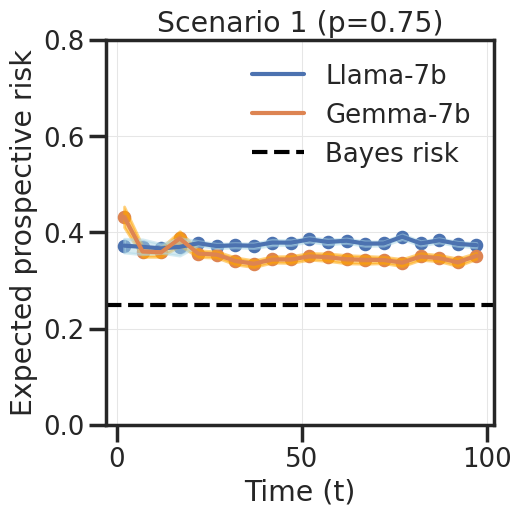

In [288]:
plt.figure(figsize=(5, 5))
plt.plot(perf[:, 0], llama_s1.mean(1)[:, 1])
plt.plot(perf[:, 0], perf[:, 1])
plt.axhline(y=0.25, color='black', linestyle='--')

plt.scatter(perf[:, 0], llama_s1.mean(1)[:, 1], s=60)
plt.scatter(perf[:, 0], perf[:, 1], s=60)


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='orange')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='lightblue')


plt.ylim([0, 0.8])

plt.title("Scenario 1 (p=0.75)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Llama-7b", "Gemma-7b", 'Bayes risk'])

plt.savefig("../figures/jun9/scenario1_p75.pdf", bbox_inches="tight")
plt.savefig("../figures/jun9/scenario1_p75.svg", bbox_inches="tight")


plt.show()

# Scenario 2 

In [384]:
gemma_s2 = np.load("../data/scenario2_gemma-7b_75.npy")
llama_s2 = np.load("../data/scenario2_Llama-2-7b-hf_75.npy")

In [385]:
perf = np.nanmean(gemma_s2, axis=1)
mean = perf[:, 1]
std = np.nanstd(gemma_s2, axis=1)[:, 1] / np.sqrt(100.0)

In [386]:
mean_l = llama_s2.mean(1)[:, 1]
std_l = llama_s2.std(1)[:, 1] / np.sqrt(100.0)

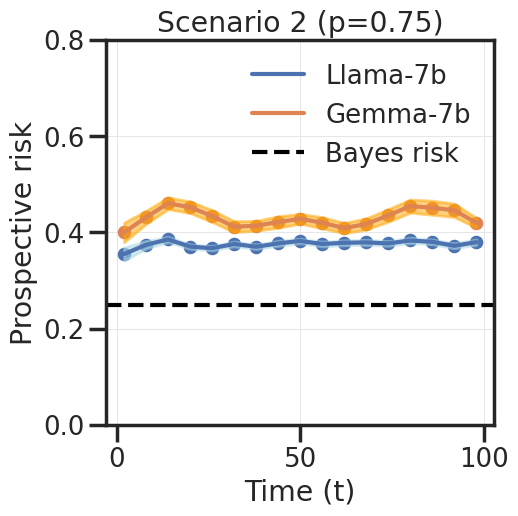

In [387]:
plt.figure(figsize=(5, 5))

plt.plot(perf[:, 0], llama_s2.mean(1)[:, 1])
plt.plot(perf[:, 0], perf[:, 1])

plt.axhline(y=0.25, color='black', linestyle='--')

plt.scatter(perf[:, 0], llama_s2.mean(1)[:, 1], s=60)
plt.scatter(perf[:, 0], perf[:, 1], s=60)

plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='orange')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='lightblue')


plt.ylim([0, 0.8])

plt.title("Scenario 2 (p=0.75)")
plt.xlabel("Time (t)")
plt.ylabel("Prospective risk")
plt.legend([ "Llama-7b", "Gemma-7b",'Bayes risk'])

plt.savefig("../figures/jun9/scenario2_p75.pdf", bbox_inches="tight")
plt.savefig("../figures/jun9/scenario2_p75.svg", bbox_inches="tight")


plt.show()

In [388]:
s2_info = np.load("../../synthetic/scenario2.npy", allow_pickle=True)
mean_mle = s2_info.item()['avg_pr'] 
std_mle = s2_info.item()['std_pr'] / 10000
mle_x = np.arange(2, 20, 1)

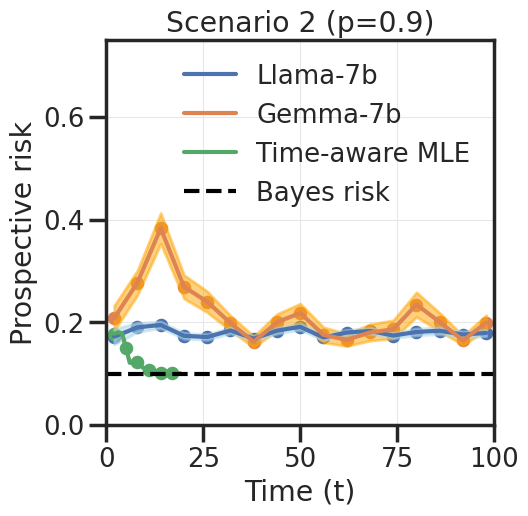

In [389]:
gemma_s2 = np.load("../data/scenario2_gemma-7b_90.npy")
llama_s2 = np.load("../data/scenario2_Llama-2-7b-hf_90.npy")

perf = np.nanmean(gemma_s2, axis=1)
mean = perf[:, 1]
std = np.nanstd(gemma_s2, axis=1)[:, 1] / np.sqrt(100.0)

mean_l = llama_s2.mean(1)[:, 1]
std_l = llama_s2.std(1)[:, 1] / np.sqrt(100.0)

plt.figure(figsize=(5, 5))
plt.plot(perf[:, 0], llama_s2.mean(1)[:, 1])
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(mle_x, mean_mle)

plt.axhline(y=0.1, color='black', linestyle='--')

plt.scatter(perf[:, 0], llama_s2.mean(1)[:, 1], s=60)
plt.scatter(perf[:, 0], perf[:, 1], s=60)
plt.scatter(mle_x[::3], mean_mle[::3], s=60)


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='orange')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='lightblue')
plt.fill_between(mle_x, mean_mle - std_mle, mean_mle + std_mle, alpha=0.5, color='green')


plt.ylim([0, 0.75])
plt.xlim([0, 100])

plt.title("Scenario 2 (p=0.9)")
plt.xlabel("Time (t)")
plt.ylabel("Prospective risk")
plt.legend(["Llama-7b", "Gemma-7b", 'Time-aware MLE', 'Bayes risk'])

plt.savefig("../figures/jun9/scenario2_p90.pdf", bbox_inches="tight")
plt.savefig("../figures/jun9/scenario2_p90.svg", bbox_inches="tight")


plt.show()

# Scenario 3

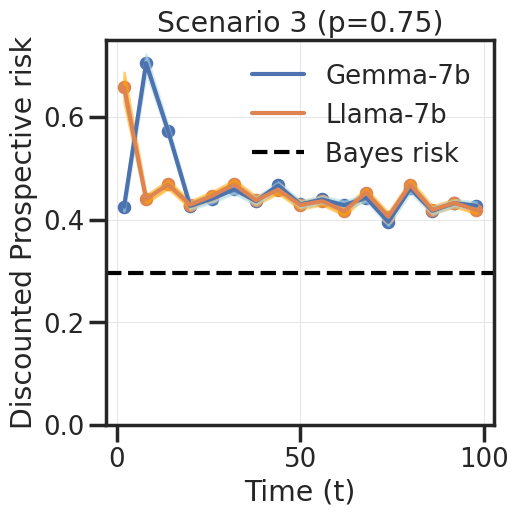

In [409]:
#gemma_s = np.load("../data/scenario2_gemma-7b_90.npy")
llama_s3 = np.load("../data/scenario3_Llama-2-7b-hf_75.npy")
gemma_s3 = np.load("../data/scenario3_gemma-7b_75.npy")

perf = np.nanmean(gemma_s3, axis=1)
mean = perf[:, 1] * 2
std = np.nanstd(gemma_s3, axis=1)[:, 1] / np.sqrt(100.0)

mean_l = llama_s3.mean(1)[:, 1] * 2
std_l = llama_s3.std(1)[:, 1] / np.sqrt(100.0)

plt.figure(figsize=(5, 5))
plt.plot(perf[:, 0], llama_s3.mean(1)[:, 1]*2)
plt.plot(perf[:, 0], perf[:, 1]*2)


plt.axhline(y=0.296, color='black', linestyle='--')

plt.scatter(perf[:, 0], llama_s3.mean(1)[:, 1] * 2, s=60)
plt.scatter(perf[:, 0], perf[:, 1]*2, s=60)


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='orange')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='lightblue')


plt.ylim([0, 0.75])

plt.title("Scenario 3 (p=0.75)")
plt.xlabel("Time (t)")
plt.ylabel("Discounted Prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

plt.savefig("../figures/jun9/scenario3_p75.pdf", bbox_inches="tight")
plt.savefig("../figures/jun9/scenario3_p75.svg", bbox_inches="tight")


plt.show()

In [10]:
s3_info = np.load("../../synthetic/scenario3_disc_4_2.npy", allow_pickle=True)
mean_mle = s3_info.item()['avg_pr'] 
std_mle = s3_info.item()['std_pr'] / 10000
mle_x = np.arange(3, 30, 1)

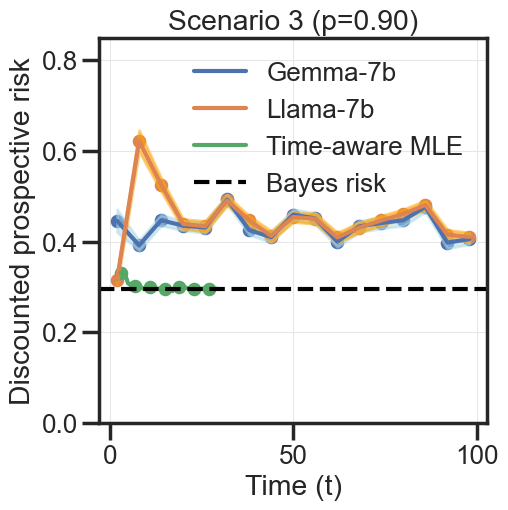

In [12]:
#gemma_s = np.load("../data/scenario2_gemma-7b_90.npy")
llama_s3 = np.load("../data/scenario3_Llama-2-7b-hf_90.npy")
gemma_s3 = np.load("../data/scenario3_gemma-7b_90.npy")

perf = np.nanmean(gemma_s3, axis=1)
mean = perf[:, 1] * 2
std = np.nanstd(gemma_s3, axis=1)[:, 1] / np.sqrt(100.0)

mean_l = llama_s3.mean(1)[:, 1] * 2
std_l = llama_s3.std(1)[:, 1] / np.sqrt(100.0)

plt.figure(figsize=(5, 5))
plt.plot(perf[:, 0], perf[:, 1] * 2)
plt.plot(perf[:, 0], llama_s3.mean(1)[:, 1] * 2)
plt.plot(mle_x, mean_mle)

plt.axhline(y=0.296, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1]* 2, s=60)
plt.scatter(perf[:, 0], llama_s3.mean(1)[:, 1]*2, s=60)
plt.scatter(mle_x[::4], mean_mle[::4], s=60)


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='lightblue')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='orange')
plt.fill_between(mle_x, mean_mle - std_mle, mean_mle + std_mle, alpha=0.5, color='green')


plt.ylim([0, 0.85])

plt.title("Scenario 3 (p=0.90)")
plt.xlabel("Time (t)")
plt.ylabel("Discounted prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Time-aware MLE', 'Bayes risk'])

plt.savefig("../figures/jun9/scenario3_p90.pdf", bbox_inches="tight")
plt.savefig("../figures/jun9/scenario3_p90.svg", bbox_inches="tight")


plt.show()